In [ ]:
import os
import shutil
import pandas as pd

def filter_images_by_loss_range(csv_file, image_folder, output_folder):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Calculate mean and standard deviation
    mean_loss = df['loss'].mean()
    std_loss = df['loss'].std()

    # Print mean and standard deviation
    print(f"Mean Loss: {mean_loss}")
    print(f"Standard Deviation of Loss: {std_loss}")

    # Define the range for filtering based on one standard deviation away from the mean
    min_loss = mean_loss
    max_loss = std_loss

    # Filter rows based on loss values within the specified range
    selected_before = len(df)
    filtered_df = df[(df['loss'] >= min_loss) & (df['loss'] <= max_loss)]
    selected_after = len(filtered_df)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Copy images to the output folder
    for index, row in filtered_df.iterrows():
        image_name = row['image_name']
        image_path = os.path.join(image_folder, image_name)
        if os.path.exists(image_path):
            shutil.copy(image_path, output_folder)
        else:
            print(f"Image {image_name} not found in the image folder.")

    print(f"Number of Images Selected Before Filtering: {selected_before}")
    print(f"Number of Images Selected After Filtering: {selected_after}")

    # Create a folder to store images not selected
    not_selected_folder = os.path.join(output_folder, 'not_selected')
    os.makedirs(not_selected_folder, exist_ok=True)

    # Copy images not selected to the not_selected folder
    selected_images = filtered_df['image_name'].tolist()
    all_images = df['image_name'].tolist()
    not_selected_images = set(all_images) - set(selected_images)
    for image_name in not_selected_images:
        image_path = os.path.join(image_folder, image_name)
        if os.path.exists(image_path):
            shutil.copy(image_path, not_selected_folder)
        else:
            print(f"Image {image_name} not found in the image folder.")

# Example usage
csv_file = '/content/drive/MyDrive/Defence/Code/Cashew/AL_anthracnose.csv'
image_folder = '/content/drive/MyDrive/Defence/Data/Trail (1)'
output_folder = '/content/drive/MyDrive/Defence/Data/new'

filter_images_by_loss_range(csv_file, image_folder, output_folder)

Mean Loss: 0.005086179016554748
Standard Deviation of Loss: 0.006108514091166844
Image 6193cashew_train_anthracnose.JPG not found in the image folder.
Image 1217cashew_train_anthracnose.JPG not found in the image folder.
Image 995cashew_train_anthracnose.JPG not found in the image folder.
Image 974cashew_valid_anthracnose.JPG not found in the image folder.
Image 2546cashew_train_anthracnose.JPG not found in the image folder.
Image 5622cashew_train_anthracnose.JPG not found in the image folder.
Image 1971cashew_train_anthracnose.JPG not found in the image folder.
Image 5775cashew_train_anthracnose.JPG not found in the image folder.
Image 288cashew_valid_anthracnose.JPG not found in the image folder.
Image 6015cashew_train_anthracnose.JPG not found in the image folder.
Image 1118cashew_train_anthracnose.JPG not found in the image folder.
Image 1130cashew_train_anthracnose.JPG not found in the image folder.
Image 1452cashew_train_anthracnose.JPG not found in the image folder.
Image 1710ca

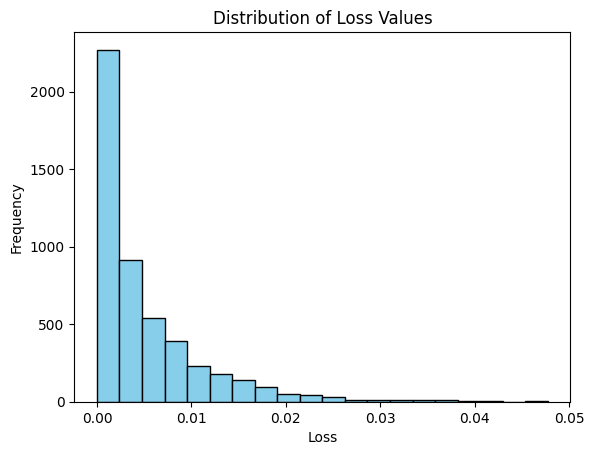

Central Range for Loss Values: (0.00095668977883175, 0.007080356823280425)
Min Loss: 0.00095668977883175, Max Loss: 0.007080356823280425
Mean Loss: 0.005086179016554748
Standard Deviation of Loss: 0.006108514091166844


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Defence/Code/Cashew/AL_anthracnose.csv')

# Calculate mean and standard deviation
mean_loss = df['loss'].mean()
std_loss = df['loss'].std()

# Analyze the loss distribution
loss_stats = df['loss'].describe()

# Visualize the distribution of loss values (optional)
plt.hist(df['loss'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Distribution of Loss Values')
plt.show()

# Identify the central range
central_range = (loss_stats['25%'], loss_stats['75%'])  # Use quartiles as the central range

# Consider outliers (optional)
# You may choose to handle outliers based on your specific use case

# Set range boundaries
min_loss = central_range[0]
max_loss = central_range[1]

print(f"Central Range for Loss Values: {central_range}")
print(f"Min Loss: {min_loss}, Max Loss: {max_loss}")
print(f"Mean Loss: {mean_loss}")
print(f"Standard Deviation of Loss: {std_loss}")

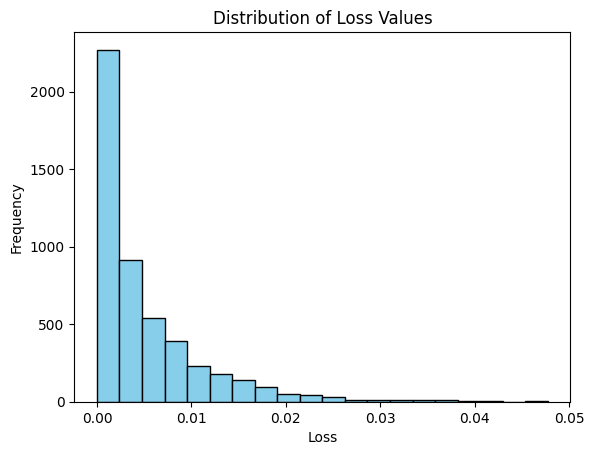

Central Range for Loss Values: (0.00095668977883175, 0.007080356823280425)
Min Loss: 0.00095668977883175, Max Loss: 0.007080356823280425


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Defence/Code/Cashew/AL_anthracnose.csv')

# Analyze the loss distribution
loss_stats = df['loss'].describe()

# Visualize the distribution of loss values (optional)
import matplotlib.pyplot as plt
plt.hist(df['loss'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Distribution of Loss Values')
plt.show()

# Identify the central range
central_range = (loss_stats['25%'], loss_stats['75%'])  # Use quartiles as the central range

# Consider outliers (optional)
# You may choose to handle outliers based on your specific use case

# Set range boundaries
min_loss = central_range[0]
max_loss = central_range[1]

print(f"Central Range for Loss Values: {central_range}")
print(f"Min Loss: {min_loss}, Max Loss: {max_loss}")


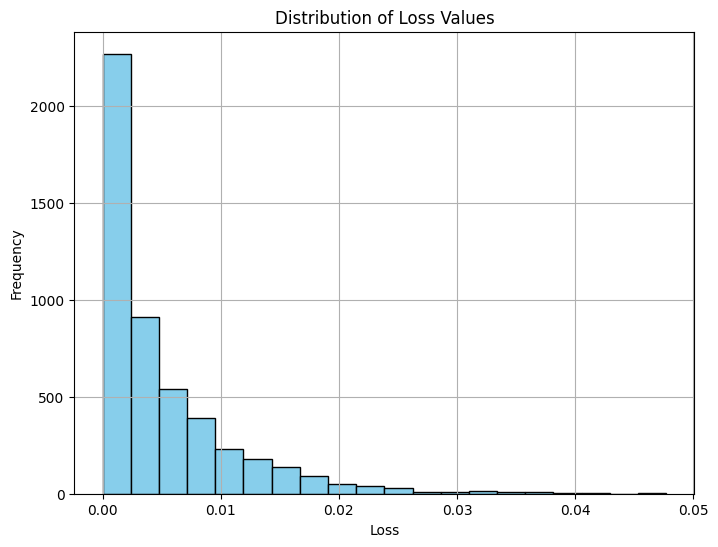

Descriptive Statistics for Loss Values:
count    4.940000e+03
mean     5.086179e-03
std      6.108514e-03
min      6.829888e-08
25%      9.566898e-04
50%      2.817375e-03
75%      7.080357e-03
max      4.771794e-02
Name: loss, dtype: float64

Central Range for Loss Values (25th - 75th percentile): (0.00095668977883175, 0.007080356823280425)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

loss_stats = df['loss'].describe()

# Visualize the distribution of loss values
plt.figure(figsize=(8, 6))
plt.hist(df['loss'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Distribution of Loss Values')
plt.grid(True)
plt.show()

# Print descriptive statistics
print("Descriptive Statistics for Loss Values:")
print(loss_stats)

# Identify the central range based on quartiles
central_range = (loss_stats['25%'], loss_stats['75%'])
print(f"\nCentral Range for Loss Values (25th - 75th percentile): {central_range}")

In [ ]:
import os
import shutil
import pandas as pd

def filter_images_by_loss_range(csv_file, image_folder, output_folder, min_loss, max_loss):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Filter rows based on loss values within the specified range
    filtered_df = df[(df['loss'] >= min_loss) & (df['loss'] <= max_loss)]

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Copy images to the output folder
    for index, row in filtered_df.iterrows():
        image_name = row['image_name']
        image_path = os.path.join(image_folder, image_name)
        if os.path.exists(image_path):
            shutil.copy(image_path, output_folder)
        else:
            print(f"Image {image_name} not found in the image folder.")

# Example usage
csv_file = '/content/drive/MyDrive/Defence/Code/Cashew/AL_anthracnose.csv'
image_folder = '/content/drive/MyDrive/Defence/Data/Dataset/Cashew/anthracnose'
output_folder = '/content/drive/MyDrive/Defence/Data/Dataset/New Data/Cashew/Anthracnose'
min_loss = 0.000000000000000000  # Minimum loss value
max_loss = 0.007080356823280425 # Maximum loss value

filter_images_by_loss_range(csv_file, image_folder, output_folder, min_loss, max_loss)

In [ ]:
import os
import shutil
import pandas as pd

def filter_images_by_loss_range(csv_file, image_folder, output_folder):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Calculate mean and standard deviation
    mean_loss = df['loss'].mean()
    std_loss = df['loss'].std()

    # Print mean and standard deviation
    print(f"Mean Loss: {mean_loss}")
    print(f"Standard Deviation of Loss: {std_loss}")

    # Define the range for filtering based on one standard deviation away from the mean
    min_loss = mean_loss
    max_loss = std_loss

    # Filter rows based on loss values within the specified range
    selected_before = len(df)
    filtered_df = df[(df['loss'] >= min_loss) & (df['loss'] <= max_loss)]
    selected_after = len(filtered_df)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Copy images to the output folder
    for index, row in filtered_df.iterrows():
        image_name = row['image_name']
        image_path = os.path.join(image_folder, image_name)
        if os.path.exists(image_path):
            shutil.copy(image_path, output_folder)
        else:
            print(f"Image {image_name} not found in the image folder.")

    print(f"Number of Images Selected Before Filtering: {selected_before}")
    print(f"Number of Images Selected After Filtering: {selected_after}")

    # Create a folder to store images not selected
    not_selected_folder = os.path.join(output_folder, 'not_selected')
    os.makedirs(not_selected_folder, exist_ok=True)

    # Copy images not selected to the not_selected folder
    selected_images = filtered_df['image_name'].tolist()
    all_images = df['image_name'].tolist()
    not_selected_images = set(all_images) - set(selected_images)
    for image_name in not_selected_images:
        image_path = os.path.join(image_folder, image_name)
        if os.path.exists(image_path):
            shutil.copy(image_path, not_selected_folder)
        else:
            print(f"Image {image_name} not found in the image folder.")

# Example usage
csv_file = '/content/drive/MyDrive/Defence/Data/Trail (1)/AL_Trail.csv'
image_folder = '/content/drive/MyDrive/Defence/Data/Trail (1)'
output_folder = '/content/drive/MyDrive/Defence/Data/new'

filter_images_by_loss_range(csv_file, image_folder, output_folder)